<a href="https://colab.research.google.com/github/HackersOm/ML_practical_programs/blob/main/ML_Practical_3s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

# --- 1. Load Dataset ---
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Select 3 features and the target variable
features = ['Glucose', 'BMI', 'Age']
target = 'Outcome'
df_subset = df[features + [target]].copy()

# Data exploration
print("Data head:")
print(df_subset.head())
print("\nData info:")
df_subset.info()

Data head:
   Glucose   BMI  Age  Outcome
0      148  33.6   50        1
1       85  26.6   31        0
2      183  23.3   32        1
3       89  28.1   21        0
4      137  43.1   33        1

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   BMI      768 non-null    float64
 2   Age      768 non-null    int64  
 3   Outcome  768 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.1 KB


In [4]:
# Preprocessing: Replace zero values in Glucose and BMI with the median
for col in ['Glucose', 'BMI']:
    df_subset[col] = df_subset[col].replace(0, np.nan)
    median_val = df_subset[col].median()
    df_subset[col] = df_subset[col].fillna(median_val)

# Check the data again after replacing zeros
print("\nData info after replacing zeros:")
df_subset.info()


Data info after replacing zeros:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    float64
 1   BMI      768 non-null    float64
 2   Age      768 non-null    int64  
 3   Outcome  768 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 24.1 KB


In [5]:
# Separate features (X) and target (y)
X = df_subset[features]
y = df_subset[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# Plot ROC Curve and Compute AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

Confusion Matrix:
[[122  29]
 [ 33  47]]

Accuracy: 0.7316017316017316
Precision: 0.618421052631579
Recall: 0.5875
F1-Score: 0.6025641025641025



AUC Score: 0.7769039735099338


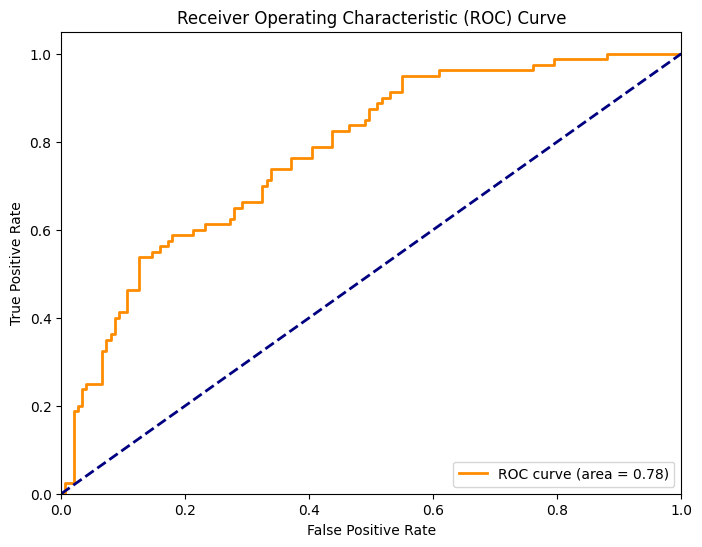

In [7]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")

print("\nAUC Score:", roc_auc)